In [1]:
% pylab inline

from scipy import ndimage as nd
from scipy.misc import imresize
from scipy.signal import convolve2d

from skimage import data
from skimage.util import img_as_float
from skimage.filters import gabor_kernel

Populating the interactive namespace from numpy and matplotlib


# Gabor Kernels
 * theta : Orientation in radians. If 0, the harmonic is in the x-direction.
 
 * frequency : Spatial frequency of the harmonic function. Specified in pixels.
 
 * sigma :  Standard deviation in x- and y-directions. These directions apply to the kernel before rotation. If theta = pi/2, then the kernel is rotated 90 degrees so that sigma_x controls the vertical direction.

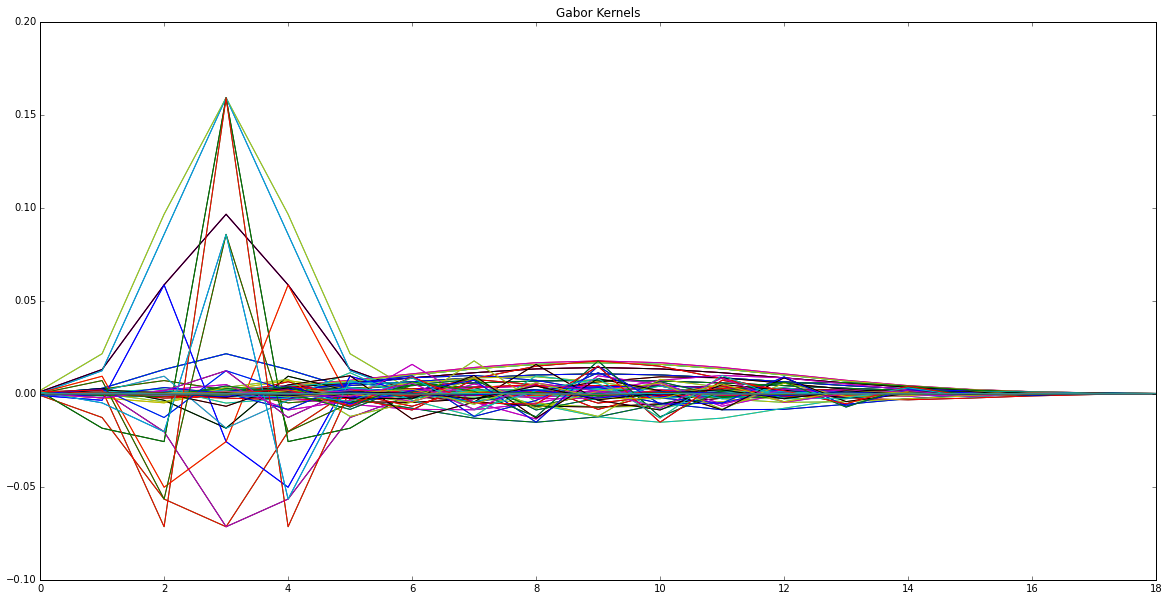

In [2]:
# prepare filter bank kernels
kernels = []
thetas = [pi * d / 180 for d in np.linspace(0,157.5,8)] # degrees -> radians
for theta in thetas: # 
    for sigma in (1, 3):
        for frequency in [1]: 
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)
plt.figure(figsize=(20,10))            
for k in np.array(kernels):
    plt.plot(k)
plt.title("Gabor Kernels")

In [3]:
# Plot a selection of the filter bank kernels and their responses.
results = []
kernel_params = []
for theta in thetas:
    for frequency in [.01]:
        kernel = gabor_kernel(frequency, theta=theta)
        params = 'theta=%d,\nfrequency=%.2f' % (theta * 180 / np.pi, frequency)
        kernel_params.append(params)
        # Save kernel and the power image for each image
        results.append(kernel)



/home/nick/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


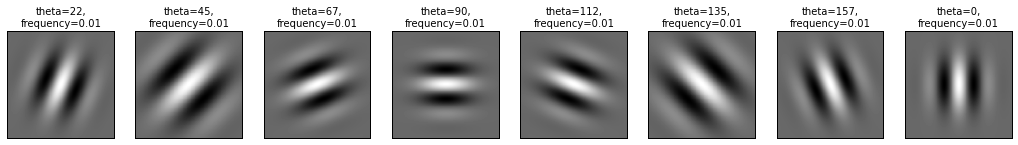

In [4]:
fig= plt.subplots(nrows=1, ncols=len(thetas), figsize=(18, 70))
plt.gray()

for label, kernel, i in zip(kernel_params, results,np.arange(len(kernels))):
    ax = plt.subplot(1,len(thetas),i)
    ax.imshow(np.real(kernel), interpolation='nearest')
    ax.set_title(label, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

In [5]:
def power(image, kernel):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return np.sqrt(nd.convolve(image, np.real(kernel), mode='wrap')**2 +
                   nd.convolve(image, np.imag(kernel), mode='wrap')**2)

new = np.zeros((300,300),dtype='float')
imshow(power(new,results[0]))

/home/nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


MemoryError: 